<h1>Importing necessary libraries and loading the datasest</h1>

In [1]:
#import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#read the csv file
data=pd.read_csv('airquality.csv')

<h1>Exploratory data analysis</h1>

In [3]:
#displaying the initial 5 data rows
data.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10-03-2023  18:00:00     2.6       1360.0     150.0      11.9   
1  10-03-2023  19:00:00     2.0       1292.0     112.0       9.4   
2  10-03-2023  20:00:00     2.2       1402.0      88.0       9.0   
3  10-03-2023  21:00:00     2.2       1376.0      80.0       9.2   
4  10-03-2023  22:00:00     1.6       1272.0      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0         1046.0    166.0        1056.0    113.0        1692.0       1268.0   
1          955.0    103.0        1174.0     92.0        1559.0        972.0   
2          939.0    131.0        1140.0    114.0        1555.0       1074.0   
3          948.0    172.0        1092.0    122.0        1584.0       1203.0   
4          836.0    131.0        1205.0    116.0        1490.0       1110.0   

      T    RH      AH  
0  13.6  48.9  0.7578  
1  13.3  47.7  0.7255  
2  11.9  54.0  0.7502  
3  11.0  60.0  0.7867  
4  11.2  59.6  0.7888

In [4]:
#displaying the end 5 rows
data.tail()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
9352  04-04-2022  10:00:00     3.1       1314.0    -200.0      13.5   
9353  04-04-2022  11:00:00     2.4       1163.0    -200.0      11.4   
9354  04-04-2022  12:00:00     2.4       1142.0    -200.0      12.4   
9355  04-04-2022  13:00:00     2.1       1003.0    -200.0       9.5   
9356  04-04-2022  14:00:00     2.2       1071.0    -200.0      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
9352         1101.0    472.0         539.0    190.0        1374.0   
9353         1027.0    353.0         604.0    179.0        1264.0   
9354         1063.0    293.0         603.0    175.0        1241.0   
9355          961.0    235.0         702.0    156.0        1041.0   
9356         1047.0    265.0         654.0    168.0        1129.0   

      PT08.S5(O3)     T    RH      AH  
9352       1729.0  21.9  29.3  0.7568  
9353       1269.0  24.3  23.7  0.7119  
9354       1092.0  26.9  18.3  0.6406  
9355        770.0  28.3  13.5  0.5139  
9356        816.0  28.5  13.1  0.5028

In [5]:
#shape = (rows, columns)
data.shape

(9357, 15)

In [6]:
#descriptive statistics for numerical columns
data.describe()

CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9347.000000  9347.000000  9347.000000  9347.000000     9347.00000   
mean    -34.159730  1049.000535  -159.046325     1.856243      894.50551   
std      77.617562   329.991364   139.857450    41.400769      342.43354   
min    -200.000000  -200.000000  -200.000000  -200.000000     -200.00000   
25%       0.600000   921.000000  -200.000000     4.000000      711.00000   
50%       1.500000  1053.000000  -200.000000     7.900000      895.00000   
75%       2.600000  1221.500000  -200.000000    13.600000     1105.00000   
max      11.900000  2040.000000  1189.000000    63.700000     2214.00000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9347.000000   9347.000000  9347.000000   9347.000000  9347.000000   
mean    168.723655    795.017118    58.199529   1391.267038   975.023751   
std     257.477551    322.124183   126.915085    467.357906   457.080603   
min    -200.000000   -200.000000  -200.000000   -200.000000  -200.000000   
25%      50.000000    637.000000    53.000000   1184.500000   700.000000   
50%     141.000000    794.000000    96.000000   1446.000000   942.000000   
75%     284.000000    960.000000   133.000000   1662.000000  1255.500000   
max    1479.000000   2683.000000   340.000000   2775.000000  2523.000000   

                 T           RH           AH  
count  9347.000000  9347.000000  9347.000000  
mean      9.760469    39.485664    -6.846343  
std      43.223114    51.242974    38.996599  
min    -200.000000  -200.000000  -200.000000  
25%      10.900000    34.100000     0.691300  
50%      17.200000    48.600000     0.976500  
75%      24.000000    61.900000     1.295600  
max      44.600000    88.700000     2.231000

In [7]:
#showing the columns of the dataset
data.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH'],
      dtype='object')

<h1>Data Preprocessing</h1>

In [8]:
# Count the number of missing values in each column of the DataFrame
data.isnull().sum()

Date             10
Time             10
CO(GT)           10
PT08.S1(CO)      10
NMHC(GT)         10
C6H6(GT)         10
PT08.S2(NMHC)    10
NOx(GT)          10
PT08.S3(NOx)     10
NO2(GT)          10
PT08.S4(NO2)     10
PT08.S5(O3)      10
T                10
RH               10
AH               10
dtype: int64

In [9]:
#Fill the missing values with 0
data.fillna(0, inplace=True)

In [11]:
#check for missing values again
data.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [12]:
#drop the date and time table since they are insignificant for air quality prediction
data.drop(['Date', 'Time'], axis=1, inplace=True)

In [13]:
# Separate the dataset into feature matrix (X) and target variable (y)
X = data.drop(columns=['PT08.S5(O3)'])    # Features (independent variables) excluding 'PT08.S5(O3)'
y = data['PT08.S5(O3)'] # Target variable (dependent variable) 'PT08.S5(O3)'

<h1>Train-Test Split</h1>

In [14]:
# Split the dataset into training and testing sets
# X_train: Features for training
# X_test: Features for testing
# y_train: Target variable for training
# y_test: Target variable for testing
# test_size=0.2: 20% of the data will be used for testing, while 80% will be used for training
# random_state=42: Random seed for reproducibility

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h1>Model Training</h1>

In [15]:
#linear regression model is used
model = LinearRegression()

In [16]:
#train the model on training data
model.fit(X_train, y_train)

LinearRegression()

<h1>Model Evaluation</h1>

In [17]:
# Make predictions on the testing data
y_pred = model.predict(X_test)
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 17721.156130372932
R-squared: 0.9158680405520042


<h1>Accuracy</h1>

In [18]:
#print accuracy of the model
accuracy = model.score(X_test, y_test)
print("Accuracy (R-squared):", accuracy*100)

Accuracy (R-squared): 91.58680405520042


<h1>Outlier Detection</h1>

<p>
    Detect outliers in the DataFrame based on specified features using the Interquartile Range (IQR) method.

    Parameters:
    
    - `df` (DataFrame): The DataFrame containing the data.
    - `features` (list): A list of feature column names to be used for outlier detection.

    Returns:
    
    - `list`: A list of indices corresponding to the outliers detected in the DataFrame.
</p>


In [19]:
def detect_outliers(df, features):
    outlier_indices = []
    for col in features:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_index = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        outlier_indices.extend(outlier_index)
    return list(set(outlier_indices))

In [20]:
# Select numerical columns from the DataFrame
numerical_features = data.select_dtypes(include=['float64', 'int64']).columns
# Detect outliers in the numerical features
outliers = detect_outliers(data, numerical_features)

In [21]:
# Print and visualize the outliers
print("Number of outliers:", len(outliers))
print("Indices of outliers:", outliers)

Number of outliers: 3901
Indices of outliers: [0, 1, 8194, 2, 3, 4, 5, 6, 7, 8, 10, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 24, 27, 28, 29, 30, 31, 32, 34, 33, 35, 36, 37, 39, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 49, 51, 53, 52, 54, 55, 56, 58, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 8266, 73, 74, 75, 76, 77, 78, 79, 82, 80, 81, 83, 84, 85, 9121, 86, 87, 88, 89, 90, 91, 92, 93, 97, 98, 94, 95, 96, 99, 100, 101, 102, 106, 103, 104, 105, 110, 111, 112, 107, 108, 109, 113, 114, 115, 116, 120, 121, 122, 117, 118, 8797, 119, 123, 124, 125, 130, 126, 127, 128, 129, 131, 136, 132, 133, 134, 135, 137, 138, 139, 140, 141, 8338, 147, 142, 143, 144, 145, 146, 148, 154, 149, 150, 151, 152, 159, 153, 155, 8354, 156, 157, 158, 160, 161, 162, 169, 170, 171, 163, 164, 165, 166, 167, 168, 178, 172, 173, 174, 175, 183, 176, 177, 179, 180, 181, 182, 8385, 201, 202, 203, 206, 207, 8409, 8410, 8414, 8415, 225, 226, 8422, 8423, 8424, 8425, 8426, 8427, 8433, 

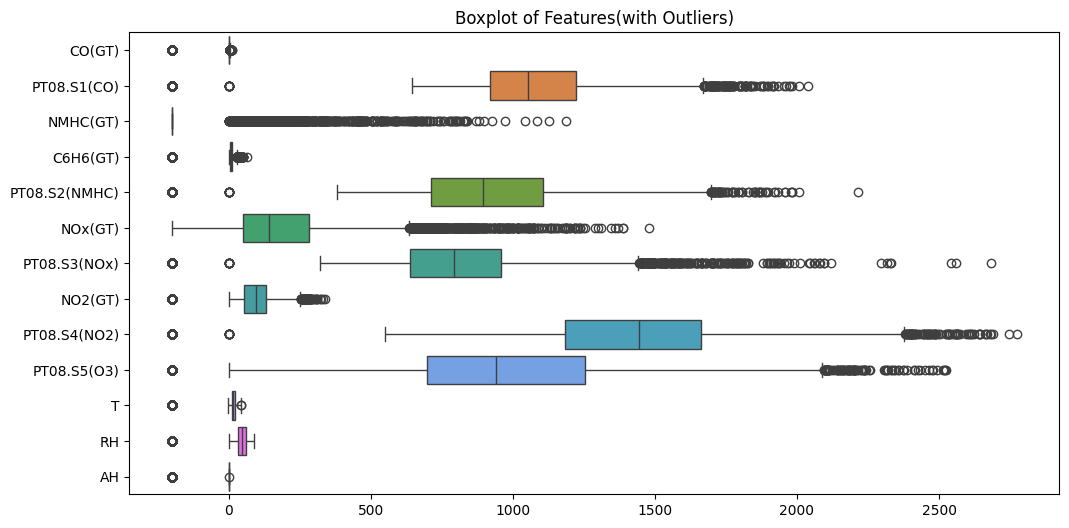

In [22]:
# Boxplot for each feature with outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, orient='h')
plt.title('Boxplot of Features(with Outliers)')
plt.show()

In [23]:
#drop the outliers
data = data.drop(outliers)

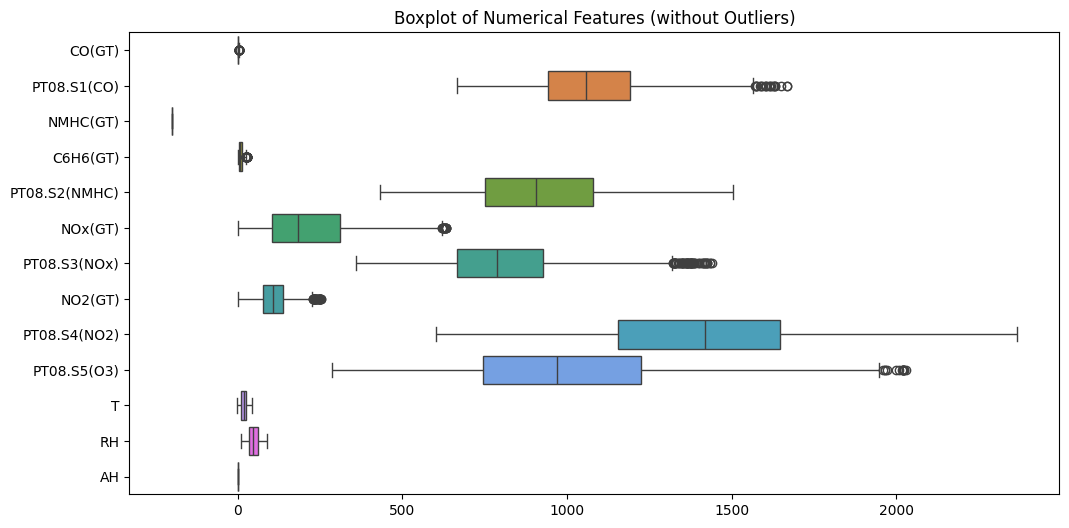

In [24]:
#boxplot without outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[numerical_features], orient='h')
plt.title('Boxplot of Numerical Features (without Outliers)')
plt.show()

<h1>Residual Analysis</h1>

In this step, we analyze the residuals, which are the differences between the actual target values (`y_test`) and the predicted values (`y_pred`). This analysis helps evaluate the performance of the trained model and identify any patterns or trends that the model may have missed.


In [25]:
# Make predictions on the testing features
y_pred = model.predict(X_test)

In [26]:
# Calculate residuals (difference between actual and predicted values)
residuals = y_test - y_pred

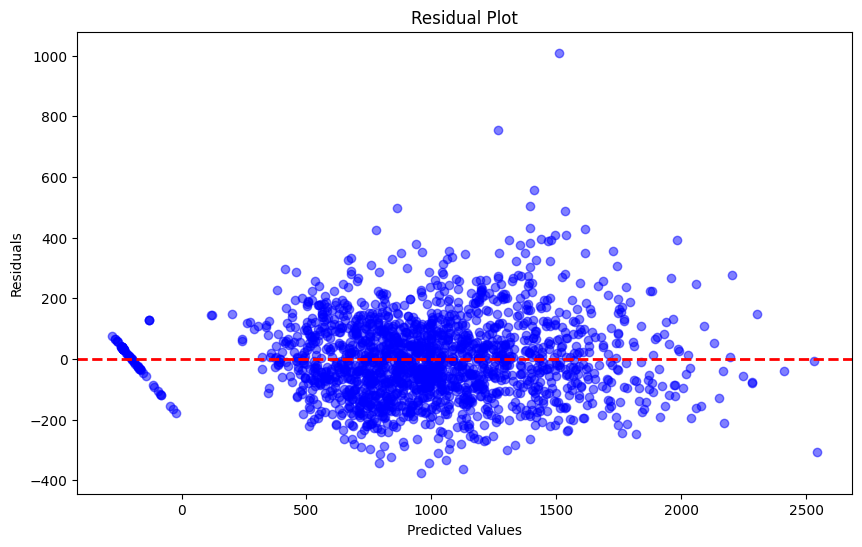

In [27]:
# Residual Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

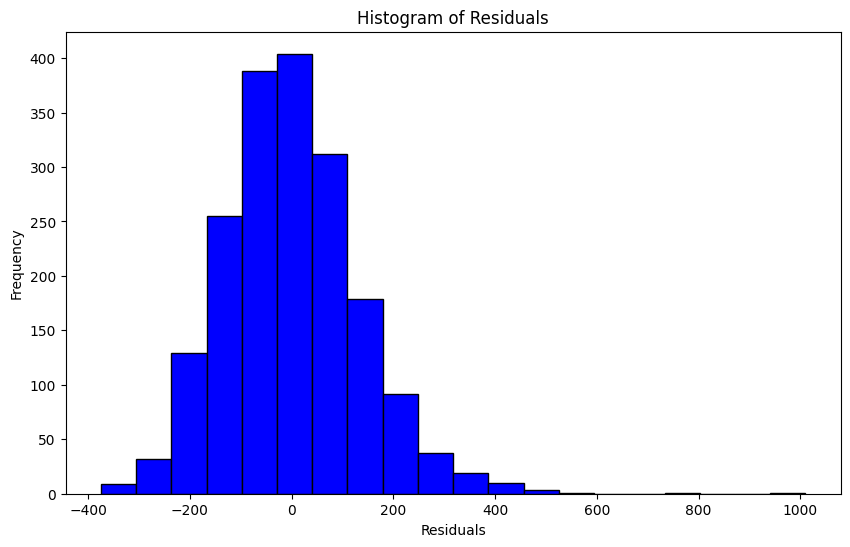

In [28]:
# Histogram of Residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, color='blue', edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

<h1>Data Visualization</h1>

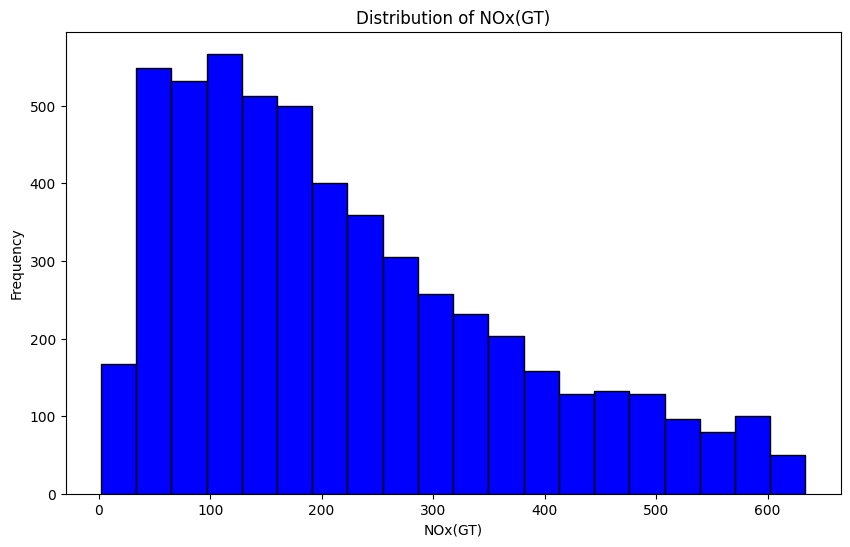

In [29]:
# Histogram for 'NOx(GT)'
plt.figure(figsize=(10, 6))
plt.hist(data['NOx(GT)'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of NOx(GT)')
plt.xlabel('NOx(GT)')
plt.ylabel('Frequency')
plt.show()

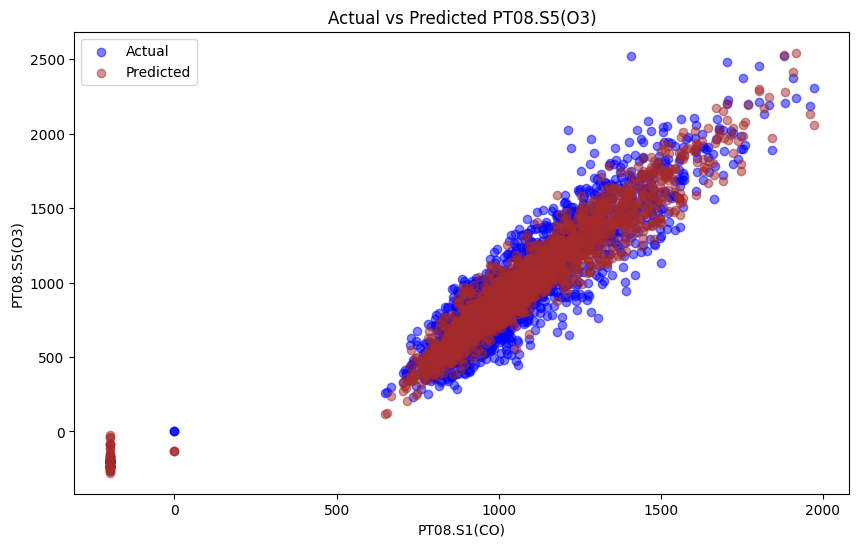

In [30]:
# Scatter Plot for 'PT08.S1(CO)' vs 'PT08.S5(O3)'
plt.figure(figsize=(10, 6))
plt.scatter(X_test['PT08.S1(CO)'], y_test, color='blue', alpha=0.5, label='Actual')
plt.scatter(X_test['PT08.S1(CO)'], y_pred, color='brown', alpha=0.5, label='Predicted')
plt.xlabel('PT08.S1(CO)')
plt.ylabel('PT08.S5(O3)')
plt.title('Actual vs Predicted PT08.S5(O3)')
plt.legend()
plt.show()

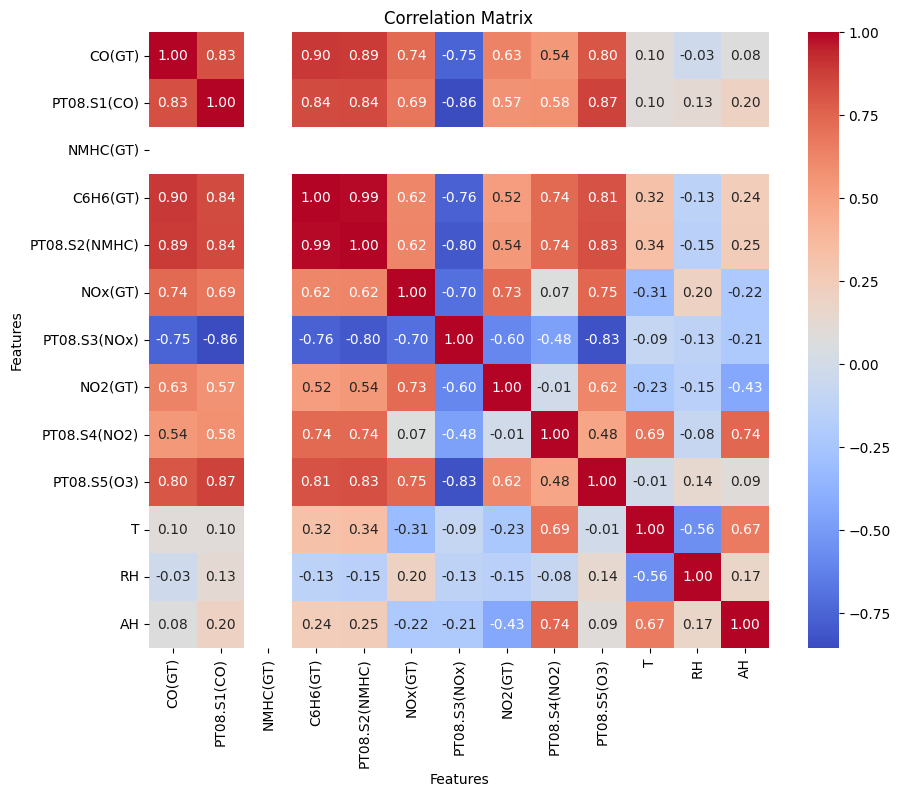

In [31]:
# Correlation Matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Correlation Matrix')
plt.show()

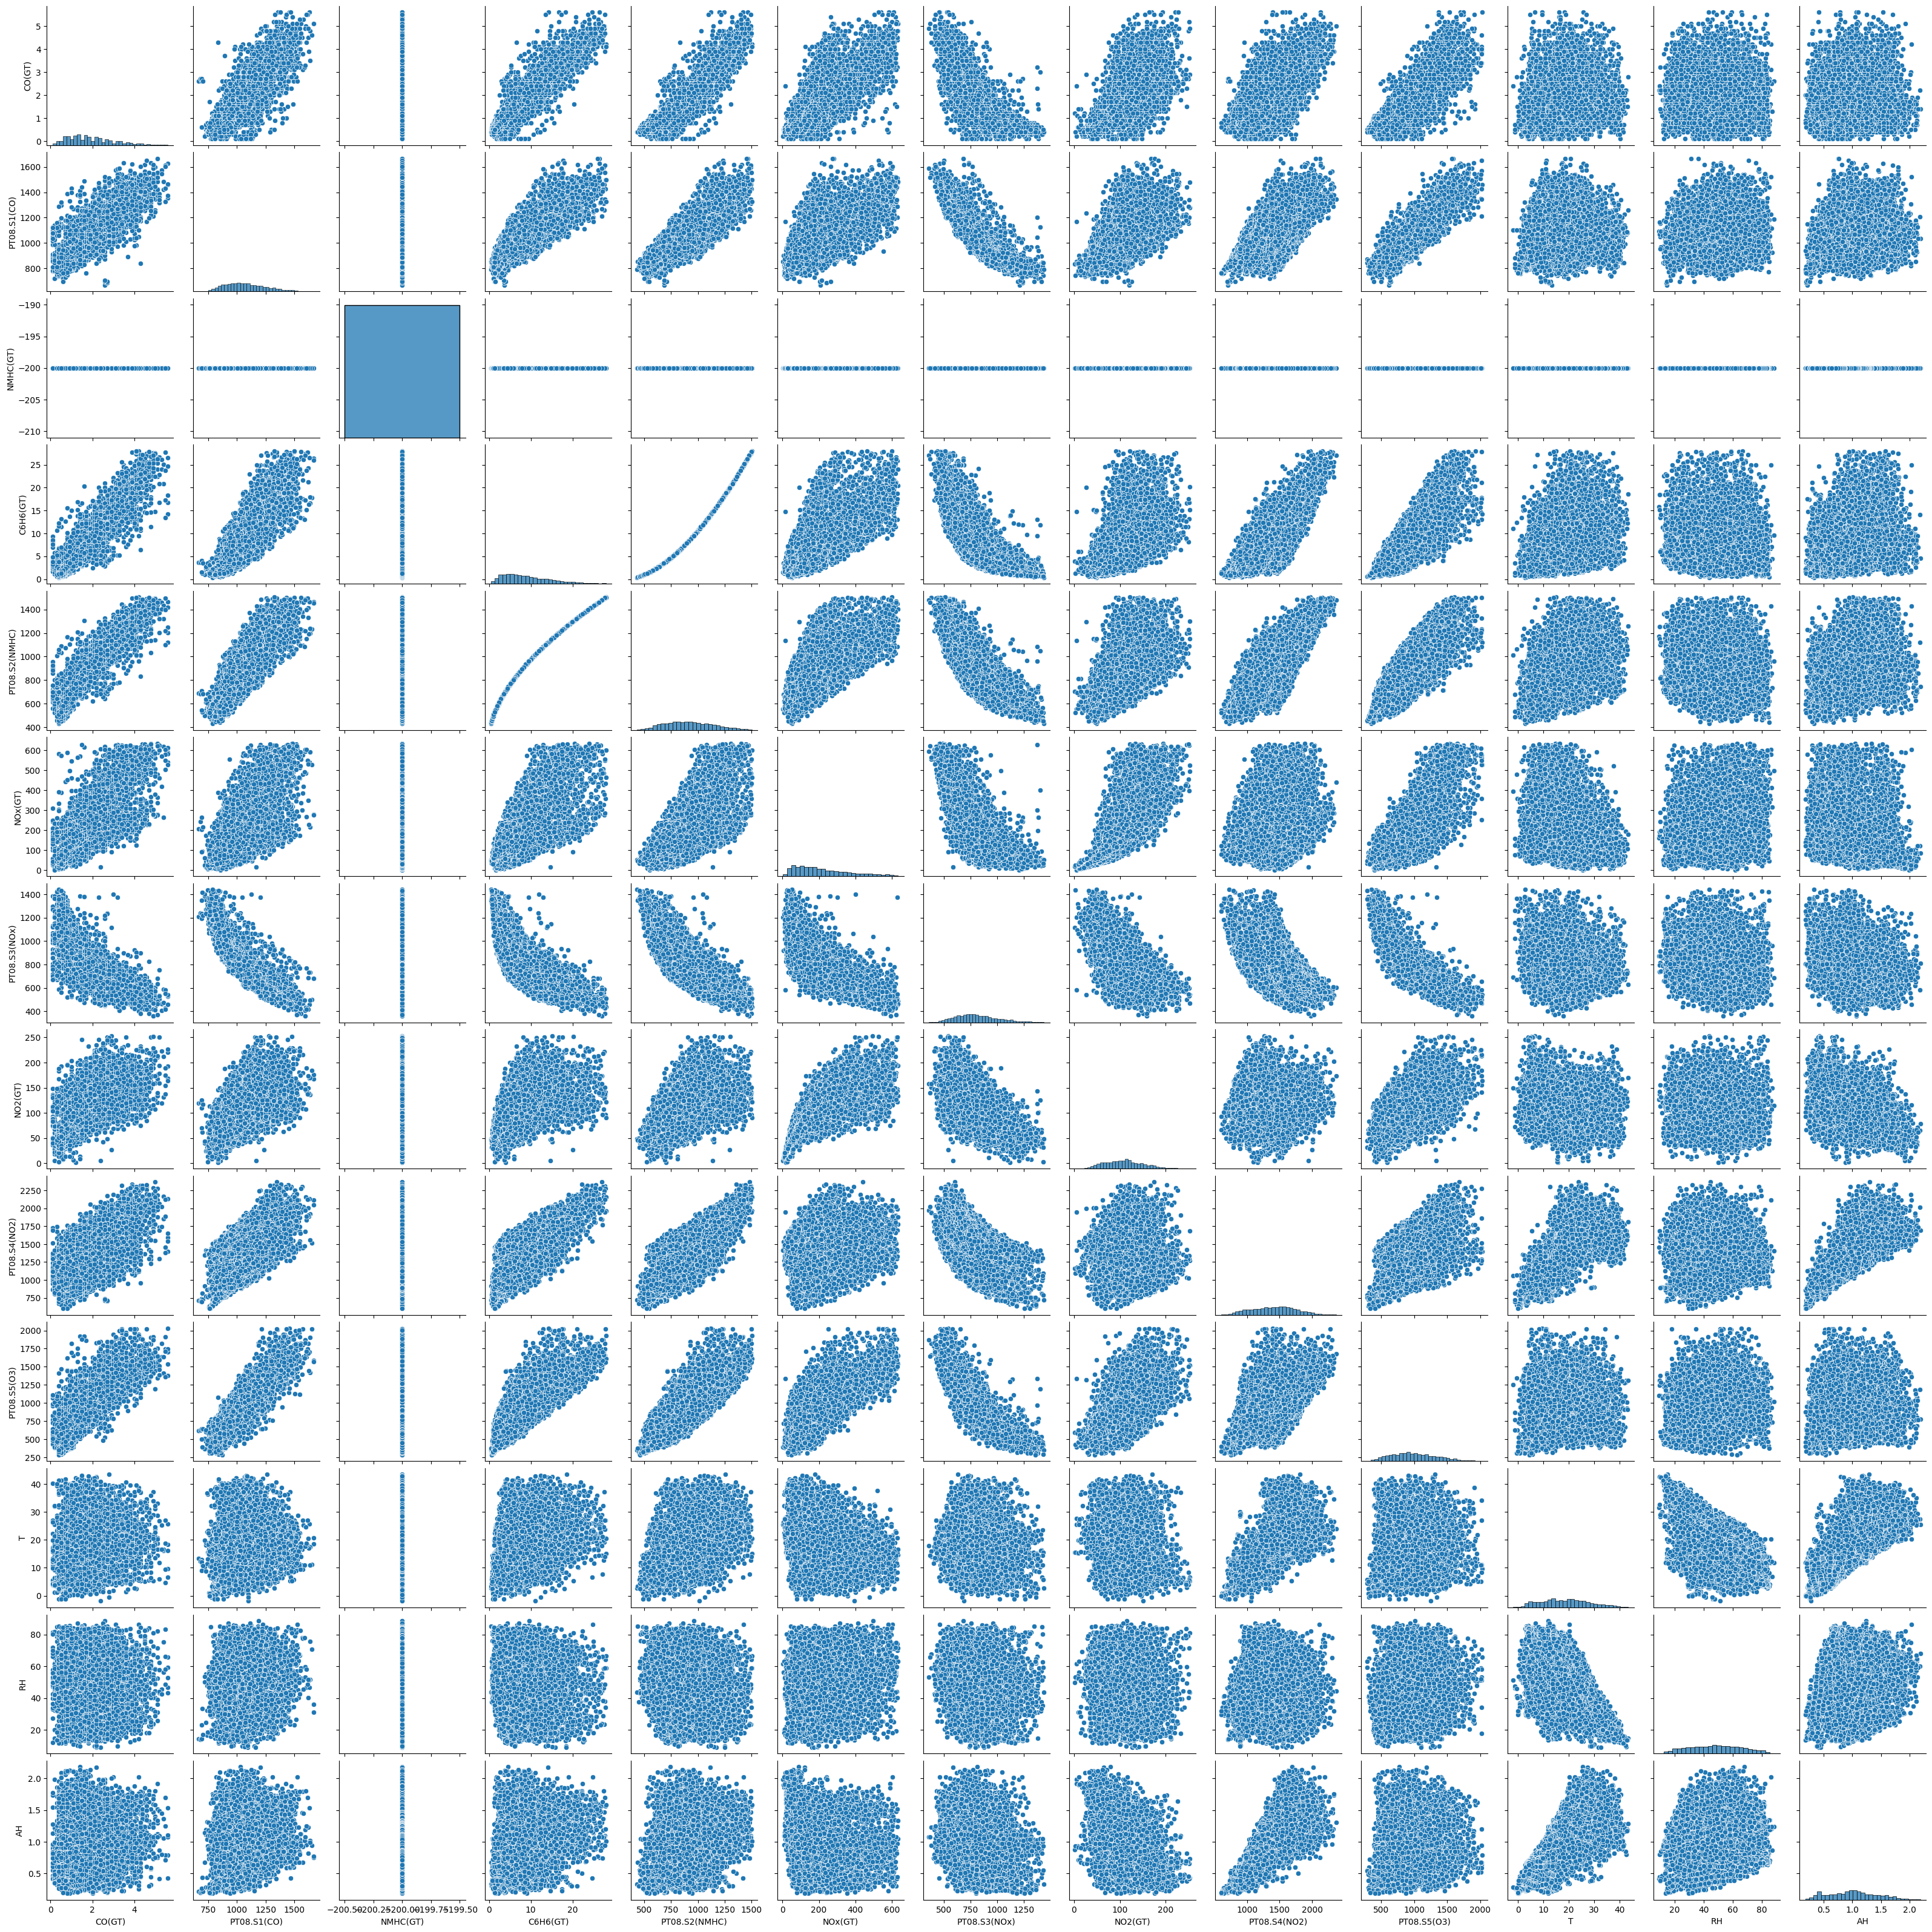

In [32]:
# Pairplot for exploring pairwise relationships
sns.pairplot(data)
plt.show()